#Linear Regression
* Simple Linear Regression
* Multilinear Regression
* Polynomial Regression

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p ~/.kaggle
!cp '//content/drive/MyDrive/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [3]:
!kaggle datasets download -d shashanknecrothapa/ames-housing-dataset

Dataset URL: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
License(s): unknown
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 44.4MB/s]


In [4]:
!unzip '/content/ames-housing-dataset.zip'

Archive:  /content/ames-housing-dataset.zip
  inflating: AmesHousing.csv         


In [5]:
import pandas as pd

In [6]:
orignal_data =  pd.read_csv("/content/AmesHousing.csv")
orignal_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df = orignal_data.copy()

In [8]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [10]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:
for col in df.columns:
  if df[col].isnull().sum() !=0:
    print(f"{col}:{df[col].isnull().sum()}")

Lot Frontage:490
Alley:2732
Mas Vnr Type:1775
Mas Vnr Area:23
Bsmt Qual:80
Bsmt Cond:80
Bsmt Exposure:83
BsmtFin Type 1:80
BsmtFin SF 1:1
BsmtFin Type 2:81
BsmtFin SF 2:1
Bsmt Unf SF:1
Total Bsmt SF:1
Electrical:1
Bsmt Full Bath:2
Bsmt Half Bath:2
Fireplace Qu:1422
Garage Type:157
Garage Yr Blt:159
Garage Finish:159
Garage Cars:1
Garage Area:1
Garage Qual:159
Garage Cond:159
Pool QC:2917
Fence:2358
Misc Feature:2824


In [12]:
df.drop(['Order', 'PID'], axis = 1, inplace = True)

for col in df.columns:
  if df[col].isnull().sum() !=0 and df[col].isnull().sum() > 500:
    df.drop(col, axis = 1, inplace = True)

In [13]:
df['MS SubClass'] = df['MS SubClass'].astype(str)
numerical_cols = df.select_dtypes(include = 'number').columns
categorical_cols = df.select_dtypes(exclude = 'number').columns

In [14]:
for col in df.columns:
  if df[col].isnull().sum() !=0:
    print(f"{col}:{df[col].isnull().sum()}")

Lot Frontage:490
Mas Vnr Area:23
Bsmt Qual:80
Bsmt Cond:80
Bsmt Exposure:83
BsmtFin Type 1:80
BsmtFin SF 1:1
BsmtFin Type 2:81
BsmtFin SF 2:1
Bsmt Unf SF:1
Total Bsmt SF:1
Electrical:1
Bsmt Full Bath:2
Bsmt Half Bath:2
Garage Type:157
Garage Yr Blt:159
Garage Finish:159
Garage Cars:1
Garage Area:1
Garage Qual:159
Garage Cond:159


In [15]:
print(type(numerical_cols))
print(type(categorical_cols))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


In [16]:
df[numerical_cols].head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,189900


In [17]:
df[categorical_cols].head()

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [18]:
numerical_data = df[numerical_cols].fillna(df[numerical_cols].median())

In [19]:
categorical_data = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [20]:
for col in numerical_data.columns:
  if numerical_data[col].isnull().sum() !=0:
    print(f"{col}:{numerical_data[col].isnull().sum()}")

In [21]:
for col in categorical_data.columns:
  if categorical_data[col].isnull().sum() !=0:
    print(f"{col}:{categorical_data[col].isnull().sum()}")

In [22]:
for col in categorical_cols:

    unique_values = categorical_data[col].nunique()

    if unique_values > 10:
        encoded_data = pd.get_dummies(categorical_data[col], prefix=col, drop_first=True)
    else:
        encoded_data = pd.get_dummies(categorical_data[col], prefix=col, drop_first=False)

    categorical_data = pd.concat([categorical_data, encoded_data], axis=1)

    categorical_data.drop(col, axis=1, inplace=True)

In [23]:
categorical_data.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [24]:
categorical_data.columns

Index(['MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180',
       'MS SubClass_190', 'MS SubClass_20', 'MS SubClass_30', 'MS SubClass_40',
       'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60',
       ...
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_Abnorml', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=255)

In [25]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2930 non-null   float64
 1   Lot Area         2930 non-null   int64  
 2   Overall Qual     2930 non-null   int64  
 3   Overall Cond     2930 non-null   int64  
 4   Year Built       2930 non-null   int64  
 5   Year Remod/Add   2930 non-null   int64  
 6   Mas Vnr Area     2930 non-null   float64
 7   BsmtFin SF 1     2930 non-null   float64
 8   BsmtFin SF 2     2930 non-null   float64
 9   Bsmt Unf SF      2930 non-null   float64
 10  Total Bsmt SF    2930 non-null   float64
 11  1st Flr SF       2930 non-null   int64  
 12  2nd Flr SF       2930 non-null   int64  
 13  Low Qual Fin SF  2930 non-null   int64  
 14  Gr Liv Area      2930 non-null   int64  
 15  Bsmt Full Bath   2930 non-null   float64
 16  Bsmt Half Bath   2930 non-null   float64
 17  Full Bath     

In [26]:
numerical_data.drop('SalePrice', axis=1, inplace=True)

In [27]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 255 entries, MS SubClass_150 to Sale Condition_Partial
dtypes: bool(255)
memory usage: 729.8 KB


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)

In [29]:
numerical_data_scaled.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0.410959,0.142420,0.555556,0.500,0.637681,0.166667,0.0700,0.113218,0.000000,0.188784,...,0.354839,0.147472,0.083558,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0
1,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.0000,0.082920,0.094364,0.115582,...,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
2,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.0675,0.163536,0.000000,0.173801,...,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
3,0.246575,0.046087,0.666667,0.500,0.695652,0.300000,0.0000,0.188696,0.000000,0.447346,...,0.350806,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0
4,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.0000,0.140149,0.000000,0.058647,...,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0


In [30]:
df_cleaned = pd.concat([numerical_data_scaled, categorical_data], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [32]:
X = df_cleaned
Y = df['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2344, 290)
(586, 290)
(2344,)
(586,)


In [34]:
Simple_model = LinearRegression()
Simple_model.fit(X_train[['Gr Liv Area']], Y_train)

LinearRegression()

In [35]:
sim_y_pred = Simple_model.predict(X_test[['Gr Liv Area']])

In [36]:
sim_y_pred

array([197061.33192318, 129181.58929057, 203251.62291797, 124912.42308726,
       117334.65307639, 160773.41919505, 128114.29773974, 174648.20935581,
        94387.8847336 , 288208.03036381, 260778.63750756, 162374.35652129,
       135798.7969057 , 203678.5395383 , 200583.39404091, 130248.8808414 ,
       165896.41863902, 196741.14445793, 130248.8808414 , 131743.08901255,
       150100.50368678, 190123.9368428 , 208374.62236194, 208801.53898227,
       202611.24798748, 268996.78244893, 213924.53842624, 174541.48020072,
       225771.47464043, 171659.79301349, 188096.08289623, 115947.17406031,
       175715.50090663, 148179.37889529, 140174.69226409, 135798.7969057 ,
       158211.91947307, 202077.60221206, 215312.01744232, 182546.16683193,
       296319.4461501 , 270917.90724041, 249892.26368912, 208481.35151703,
       131636.35985747, 273799.59442765, 178170.27147354, 171019.41808299,
       169525.20991184, 107302.11249861, 196847.87361301, 126833.54787875,
       154689.85735534, 2

In [37]:
sim_mse = mean_squared_error(Y_test, sim_y_pred)
sim_r2 = r2_score(Y_test, sim_y_pred)

print(f"Mean Squared Error: {sim_mse}")
print(f"R-squared: {sim_r2}")

Mean Squared Error: 3821184066.2726426
R-squared: 0.523397415369115


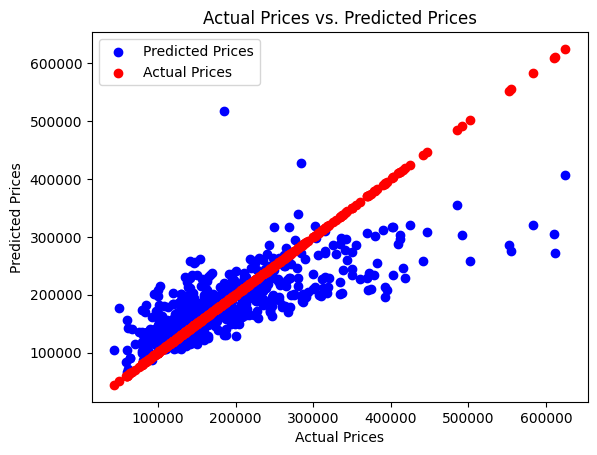

In [38]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, sim_y_pred, color='blue', label='Predicted Prices')
plt.scatter(Y_test, Y_test, color='red', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

In [39]:
multi_model = LinearRegression()
multi_model.fit(X_train, Y_train)

LinearRegression()

In [40]:
multi_y_pred = multi_model.predict(X_test)

In [41]:
multi_y_pred

array([160796.06784484, 111544.7610748 , 193709.94234114, 129444.95781916,
       129545.41532224, 190991.48260967, 162632.42988726, 144108.3303298 ,
       100170.87399052, 369749.86157243, 220769.28897459, 255547.52865697,
        66049.53244152, 130316.66938946,  67509.09516719, 183953.71802153,
       138441.08987039, 194364.75418423, 126900.90529423, 157369.45559477,
       178130.87782343, 133397.00503126, 203226.38860126, 203014.10104875,
       198707.96566274, 259441.49101702, 374311.75192655, 228961.99015773,
       194615.15001725, 238942.29674587, 194059.00110344,  81331.42208414,
       220480.24575333,  87255.22812157, 125210.52692426,  60625.67179424,
       191643.01728051, 339192.54332987, 186510.59736857, 298950.80744886,
       343761.31932186, 232488.42941281, 251191.22613001, 191924.39774389,
       134634.55915098, 333092.45712431, 186983.44015735, 152685.70416309,
       166905.66241761, 117423.70892144, 185528.15493756, 133660.34220539,
       136713.62957301, 1

In [42]:
multi_mse = mean_squared_error(Y_test, multi_y_pred)
multi_r2 = r2_score(Y_test, multi_y_pred)

print(f"Mean Squared Error: {multi_mse}")
print(f"R-squared: {multi_r2}")

Mean Squared Error: 855013615.7722139
R-squared: 0.8933572180496577


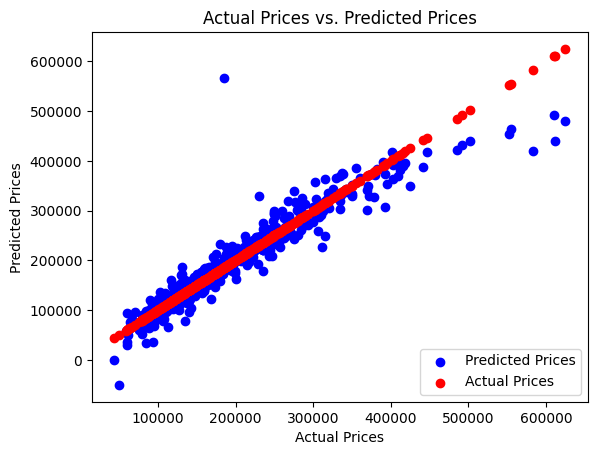

In [43]:
plt.scatter(Y_test, multi_y_pred, color='blue', label='Predicted Prices')
plt.scatter(Y_test, Y_test, color='red', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

In [44]:
poly_model = LinearRegression()
poly_features = PolynomialFeatures(degree=2)

In [45]:
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [46]:
poly_model.fit(X_poly_train, Y_train)
poly_y_pred = poly_model.predict(X_poly_test)

In [47]:
poly_y_pred

array([ 1.93168196e+05,  9.80710836e+04,  2.51873569e+05,  1.30607950e+05,
        7.51599570e+04,  2.20069930e+05,  6.16499541e+04,  1.54565988e+05,
        1.14603570e+05,  4.51576149e+05,  2.57086488e+05,  2.47872394e+05,
        1.08217719e+05,  1.11252853e+05,  1.29005338e+05,  1.40305670e+05,
        1.42241071e+05,  1.72750302e+05,  1.05288408e+05,  1.39657623e+05,
        1.90424969e+05,  1.01405002e+05,  2.23599920e+05,  1.94064281e+05,
        2.31559671e+05,  2.67014367e+05,  3.26024946e+05,  2.47281356e+05,
        1.81090439e+05,  2.04174100e+05,  2.04614315e+05,  7.04448577e+04,
        2.43711737e+05,  1.14624596e+05,  1.35217125e+05,  7.98208719e+04,
        2.07110029e+05,  3.11159560e+05,  1.77873652e+05,  2.29378239e+05,
        3.00106288e+05,  1.32958689e+05,  2.07520198e+05,  1.84443192e+05,
        6.76127435e+04,  3.65447146e+05,  1.79298147e+05,  8.48707610e+04,
        1.64891980e+05,  1.09619492e+05,  1.65033073e+05,  1.05209741e+05,
        1.45686410e+05,  

In [48]:
poly_mse = mean_squared_error(Y_test, poly_y_pred)
poly_r2 = r2_score(Y_test, poly_y_pred)

print(f"Mean Squared Error: {poly_mse}")
print(f"R-squared: {poly_r2}")

Mean Squared Error: 1777160257.1188903
R-squared: 0.7783411745793358


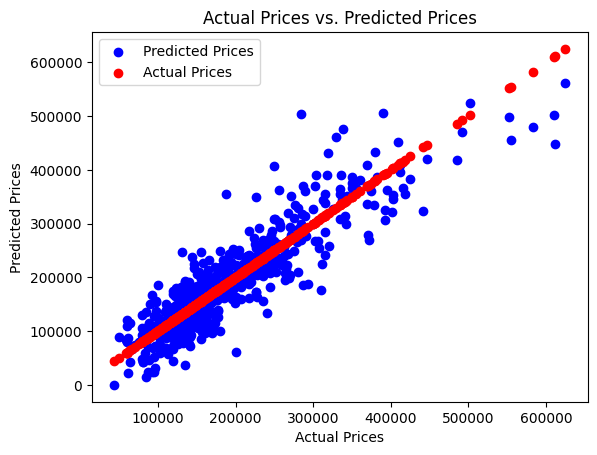

In [49]:
plt.scatter(Y_test, poly_y_pred, color='blue', label='Predicted Prices')
plt.scatter(Y_test, Y_test, color='red', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

# Logistic Regression

In [50]:
!kaggle datasets download -d rajyellow46/wine-quality
!kaggle datasets download -d henriqueyamahata/bank-marketing

Dataset URL: https://www.kaggle.com/datasets/rajyellow46/wine-quality
License(s): other
  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 64.0MB/s]
Dataset URL: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
License(s): other
  0% 0.00/393k [00:00<?, ?B/s]
100% 393k/393k [00:00<00:00, 95.6MB/s]


In [51]:
!unzip '/content/bank-marketing.zip'

Archive:  /content/bank-marketing.zip
  inflating: bank-additional-full.csv  
  inflating: bank-additional-names.txt  


In [52]:
orignal_bank_data = pd.read_csv("/content/bank-additional-full.csv", sep=';')
orignal_bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
df = orignal_bank_data.copy()

In [54]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [56]:
df.columns = df.columns.str.strip()

column_mapping = {
    "age": "Age",
    "job": "Job_Type",
    "marital": "Marital_Status",
    "education": "Education_Level",
    "default": "Has_Credit_Default",
    "housing": "Has_Housing_Loan",
    "loan": "Has_Personal_Loan",
    "contact": "Contact_Type",
    "month": "Last_Contact_Month",
    "day_of_week": "Last_Contact_Day",
    "duration": "Contact_Duration",
    "campaign": "Campaign_Contacts",
    "pdays": "Days_Since_Prev_Contact",
    "previous": "Previous_Contacts",
    "poutcome": "Prev_Campaign_Outcome",
    "emp.var.rate": "Employment_Var_Rate",
    "cons.price.idx": "Consumer_Price_Index",
    "cons.conf.idx": "Consumer_Confidence_Index",
    "euribor3m": "Euribor_3M_Rate",
    "nr.employed": "Number_Employed",
    "y": "Term_Deposit_Subscription"
}

df.rename(columns=column_mapping, inplace=True)

In [57]:
df.columns

Index(['Age', 'Job_Type', 'Marital_Status', 'Education_Level',
       'Has_Credit_Default', 'Has_Housing_Loan', 'Has_Personal_Loan',
       'Contact_Type', 'Last_Contact_Month', 'Last_Contact_Day',
       'Contact_Duration', 'Campaign_Contacts', 'Days_Since_Prev_Contact',
       'Previous_Contacts', 'Prev_Campaign_Outcome', 'Employment_Var_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'Euribor_3M_Rate',
       'Number_Employed', 'Term_Deposit_Subscription'],
      dtype='object')

In [58]:
df.drop_duplicates(inplace = True)

In [59]:
df

,Age,Job_Type,Marital_Status,Education_Level,Has_Credit_Default,Has_Housing_Loan,Has_Personal_Loan,Contact_Type,Last_Contact_Month,Last_Contact_Day,...,Campaign_Contacts,Days_Since_Prev_Contact,Previous_Contacts,Prev_Campaign_Outcome,Employment_Var_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Number_Employed,Term_Deposit_Subscription
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        41176 non-null  int64  
 1   Job_Type                   41176 non-null  object 
 2   Marital_Status             41176 non-null  object 
 3   Education_Level            41176 non-null  object 
 4   Has_Credit_Default         41176 non-null  object 
 5   Has_Housing_Loan           41176 non-null  object 
 6   Has_Personal_Loan          41176 non-null  object 
 7   Contact_Type               41176 non-null  object 
 8   Last_Contact_Month         41176 non-null  object 
 9   Last_Contact_Day           41176 non-null  object 
 10  Contact_Duration           41176 non-null  int64  
 11  Campaign_Contacts          41176 non-null  int64  
 12  Days_Since_Prev_Contact    41176 non-null  int64  
 13  Previous_Contacts          41176 non-null  int64  


In [61]:
for col in df.columns:
  if df[col].isnull().sum() !=0:
    print(f"{col}:{df[col].isnull().sum()}")

In [62]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"{col} : {df[col].unique()}")

Job_Type : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital_Status : ['married' 'single' 'divorced' 'unknown']
Education_Level : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Has_Credit_Default : ['no' 'unknown' 'yes']
Has_Housing_Loan : ['no' 'yes' 'unknown']
Has_Personal_Loan : ['no' 'yes' 'unknown']
Contact_Type : ['telephone' 'cellular']
Last_Contact_Month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Last_Contact_Day : ['mon' 'tue' 'wed' 'thu' 'fri']
Prev_Campaign_Outcome : ['nonexistent' 'failure' 'success']
Term_Deposit_Subscription : ['no' 'yes']


In [63]:
for col in df.columns:
    if df[col].dtype == 'object':
        median_value = df[col].mode()[0]
        df[col] = df[col].replace('unknown', median_value)

In [64]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"{col} : {df[col].unique()}")

Job_Type : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
Marital_Status : ['married' 'single' 'divorced']
Education_Level : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
Has_Credit_Default : ['no' 'yes']
Has_Housing_Loan : ['no' 'yes']
Has_Personal_Loan : ['no' 'yes']
Contact_Type : ['telephone' 'cellular']
Last_Contact_Month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Last_Contact_Day : ['mon' 'tue' 'wed' 'thu' 'fri']
Prev_Campaign_Outcome : ['nonexistent' 'failure' 'success']
Term_Deposit_Subscription : ['no' 'yes']


In [65]:
df.describe()

,Age,Contact_Duration,Campaign_Contacts,Days_Since_Prev_Contact,Previous_Contacts,Employment_Var_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Number_Employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [66]:
map_month = {
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

df['Last_Contact_Month'] = df['Last_Contact_Month'].map(map_month)

In [67]:
df['Last_Contact_Month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9])

In [68]:
day_map = {
    'mon':1,
    'tue':2,
    'wed':3,
    'thu':4,
    'fri':5
}
df['Last_Contact_Day'] = df['Last_Contact_Day'].map(day_map)

In [69]:
df['Last_Contact_Day'].unique()

array([1, 2, 3, 4, 5])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        41176 non-null  int64  
 1   Job_Type                   41176 non-null  object 
 2   Marital_Status             41176 non-null  object 
 3   Education_Level            41176 non-null  object 
 4   Has_Credit_Default         41176 non-null  object 
 5   Has_Housing_Loan           41176 non-null  object 
 6   Has_Personal_Loan          41176 non-null  object 
 7   Contact_Type               41176 non-null  object 
 8   Last_Contact_Month         41176 non-null  int64  
 9   Last_Contact_Day           41176 non-null  int64  
 10  Contact_Duration           41176 non-null  int64  
 11  Campaign_Contacts          41176 non-null  int64  
 12  Days_Since_Prev_Contact    41176 non-null  int64  
 13  Previous_Contacts          41176 non-null  int64  


In [71]:
df.drop('Days_Since_Prev_Contact', axis = 1, inplace = True)

In [72]:
df

,Age,Job_Type,Marital_Status,Education_Level,Has_Credit_Default,Has_Housing_Loan,Has_Personal_Loan,Contact_Type,Last_Contact_Month,Last_Contact_Day,Contact_Duration,Campaign_Contacts,Previous_Contacts,Prev_Campaign_Outcome,Employment_Var_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Number_Employed,Term_Deposit_Subscription
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,5,1,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [73]:
df.dropna(inplace = True)

In [74]:
df

,Age,Job_Type,Marital_Status,Education_Level,Has_Credit_Default,Has_Housing_Loan,Has_Personal_Loan,Contact_Type,Last_Contact_Month,Last_Contact_Day,Contact_Duration,Campaign_Contacts,Previous_Contacts,Prev_Campaign_Outcome,Employment_Var_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Number_Employed,Term_Deposit_Subscription
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,5,1,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [75]:
numerical_col = df.select_dtypes(['int64', 'float64'])

In [76]:
categorical_col = df.select_dtypes('object')

In [77]:
print(type(numerical_col))
numerical_col.head()

<class 'pandas.core.frame.DataFrame'>


,Age,Last_Contact_Month,Last_Contact_Day,Contact_Duration,Campaign_Contacts,Previous_Contacts,Employment_Var_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Number_Employed
0,56,5,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,5,1,149,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,5,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,5,1,151,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,5,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0


In [78]:
categorical_col.head()

,Job_Type,Marital_Status,Education_Level,Has_Credit_Default,Has_Housing_Loan,Has_Personal_Loan,Contact_Type,Prev_Campaign_Outcome,Term_Deposit_Subscription
0,housemaid,married,basic.4y,no,no,no,telephone,nonexistent,no
1,services,married,high.school,no,no,no,telephone,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,nonexistent,no


In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_col)
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_col.columns)

In [80]:
numerical_data_scaled.head()

,Age,Last_Contact_Month,Last_Contact_Day,Contact_Duration,Campaign_Contacts,Previous_Contacts,Employment_Var_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Number_Employed
0,1.533143,-0.787723,-1.402457,0.010352,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
1,1.629107,-0.787723,-1.402457,-0.421577,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
2,-0.290177,-0.787723,-1.402457,-0.124626,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
3,-0.002284,-0.787723,-1.402457,-0.413864,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
4,1.533143,-0.787723,-1.402457,0.187751,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695


In [81]:
categorical_col

,Job_Type,Marital_Status,Education_Level,Has_Credit_Default,Has_Housing_Loan,Has_Personal_Loan,Contact_Type,Prev_Campaign_Outcome,Term_Deposit_Subscription
0,housemaid,married,basic.4y,no,no,no,telephone,nonexistent,no
1,services,married,high.school,no,no,no,telephone,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,nonexistent,no
...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nonexistent,yes


In [82]:
categorical_data = pd.get_dummies(categorical_col)

In [83]:
categorical_data.head()

,Job_Type_admin.,Job_Type_blue-collar,Job_Type_entrepreneur,Job_Type_housemaid,Job_Type_management,Job_Type_retired,Job_Type_self-employed,Job_Type_services,Job_Type_student,Job_Type_technician,...,Has_Housing_Loan_yes,Has_Personal_Loan_no,Has_Personal_Loan_yes,Contact_Type_cellular,Contact_Type_telephone,Prev_Campaign_Outcome_failure,Prev_Campaign_Outcome_nonexistent,Prev_Campaign_Outcome_success,Term_Deposit_Subscription_no,Term_Deposit_Subscription_yes
0,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,False,True,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,True,False,True,False,True,False


In [84]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Job_Type_admin.                      41176 non-null  bool 
 1   Job_Type_blue-collar                 41176 non-null  bool 
 2   Job_Type_entrepreneur                41176 non-null  bool 
 3   Job_Type_housemaid                   41176 non-null  bool 
 4   Job_Type_management                  41176 non-null  bool 
 5   Job_Type_retired                     41176 non-null  bool 
 6   Job_Type_self-employed               41176 non-null  bool 
 7   Job_Type_services                    41176 non-null  bool 
 8   Job_Type_student                     41176 non-null  bool 
 9   Job_Type_technician                  41176 non-null  bool 
 10  Job_Type_unemployed                  41176 non-null  bool 
 11  Marital_Status_divorced              41176 non-null  bool 


In [85]:
df_cleaned = pd.concat([numerical_data_scaled, categorical_data], axis = 1)

In [86]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  41176 non-null  float64
 1   Last_Contact_Month                   41176 non-null  float64
 2   Last_Contact_Day                     41176 non-null  float64
 3   Contact_Duration                     41176 non-null  float64
 4   Campaign_Contacts                    41176 non-null  float64
 5   Previous_Contacts                    41176 non-null  float64
 6   Employment_Var_Rate                  41176 non-null  float64
 7   Consumer_Price_Index                 41176 non-null  float64
 8   Consumer_Confidence_Index            41176 non-null  float64
 9   Euribor_3M_Rate                      41176 non-null  float64
 10  Number_Employed                      41176 non-null  float64
 11  Job_Type_admin.             

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [88]:
df_cleaned.dropna(inplace = True)
Y = df_cleaned['Term_Deposit_Subscription_yes'].astype(int)
df_cleaned.drop(['Term_Deposit_Subscription_yes', 'Term_Deposit_Subscription_no'], axis = 1, inplace = True)

In [89]:
print("Y.shape:", Y.shape)
print("df.shape:", df_cleaned.shape)

Y.shape: (41164,)
df.shape: (41164, 43)


In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(df_cleaned, Y, test_size = 0.2, random_state = 42)

In [91]:
binary_lr_model = LogisticRegression()
binary_lr_model.fit(X_train, Y_train)

LogisticRegression()

In [92]:
y_pred = binary_lr_model.predict(X_test)

In [93]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9004008259443702
Precision: 0.8791923383521484
Recall: 0.9004008259443702


# Multinomial Logistic Regression

In [94]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target

In [95]:
X.shape

(150, 4)

In [96]:
Y.shape

(150,)

In [97]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [98]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)



In [100]:
multi_lr_model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
multi_lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [101]:
multi_y_pred = multi_lr_model.predict(X_test)

In [102]:
accuracy = accuracy_score(Y_test, multi_y_pred)
precision = precision_score(Y_test, multi_y_pred, average = 'weighted')
recall = recall_score(Y_test, multi_y_pred, average = 'weighted')
f1 = f1_score(Y_test, multi_y_pred, average = 'weighted')

In [103]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
